In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print(customers.info())
print(products.info())
print(transactions.info())

print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [6]:

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

missing_customers = set(transactions['CustomerID']) - set(customers['CustomerID'])
missing_products = set(transactions['ProductID']) - set(products['ProductID'])
print(f"Missing Customers: {missing_customers}")
print(f"Missing Products: {missing_products}")


Missing Customers: set()
Missing Products: set()


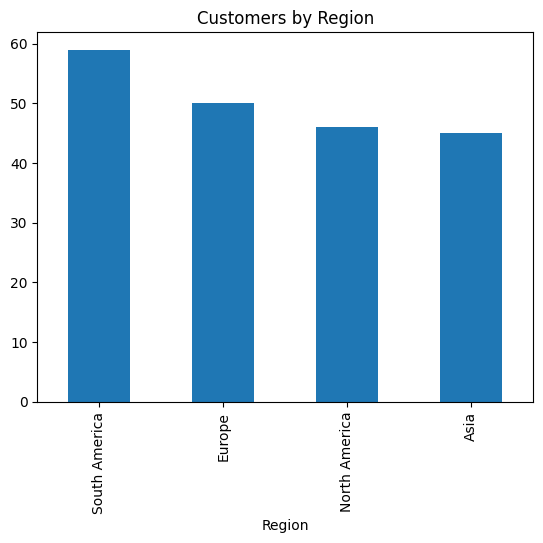

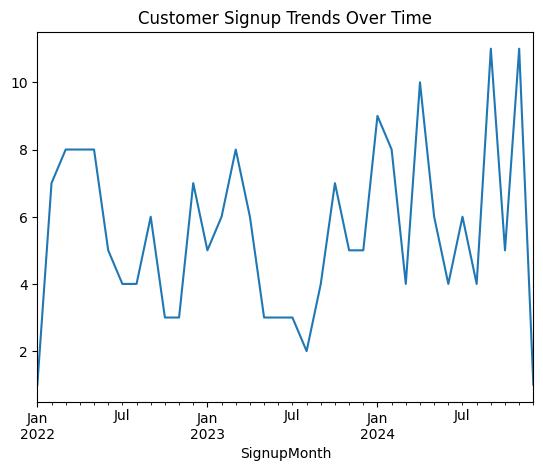

In [7]:

customer_region = customers['Region'].value_counts()
customer_region.plot(kind='bar', title='Customers by Region')
plt.show()

customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers.groupby('SignupMonth').size()
signup_trends.plot(title='Customer Signup Trends Over Time')
plt.show()


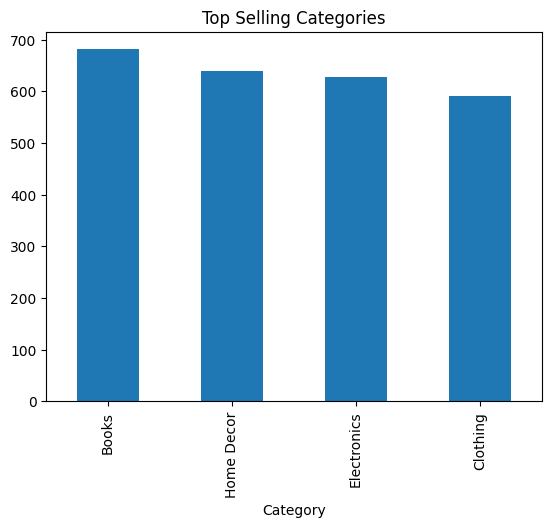

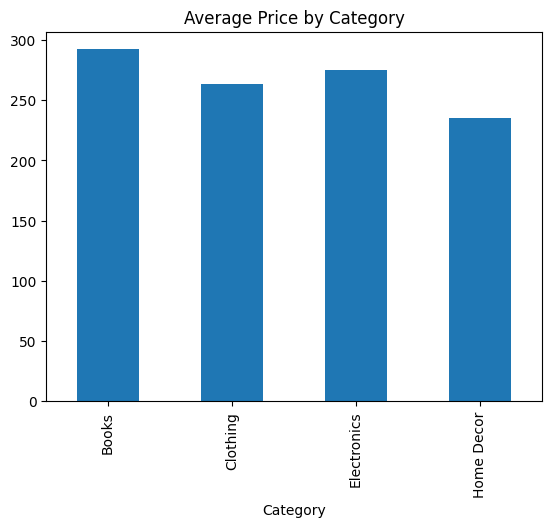

In [8]:

transaction_data = transactions.merge(products, on='ProductID')


top_categories = transaction_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
top_categories.plot(kind='bar', title='Top Selling Categories')
plt.show()


avg_price_category = products.groupby('Category')['Price'].mean()
avg_price_category.plot(kind='bar', title='Average Price by Category')
plt.show()


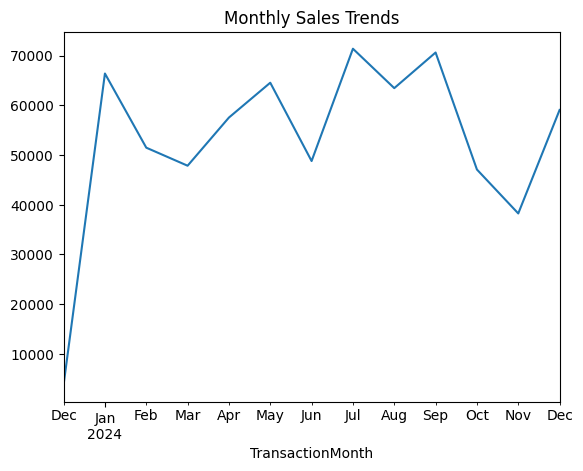

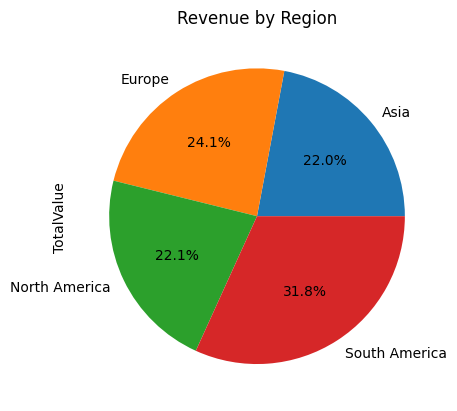

In [9]:

transaction_data['TransactionMonth'] = transaction_data['TransactionDate'].dt.to_period('M')
monthly_sales = transaction_data.groupby('TransactionMonth')['TotalValue'].sum()
monthly_sales.plot(title='Monthly Sales Trends')
plt.show()


transaction_region = transaction_data.merge(customers, on='CustomerID') \
    .groupby('Region')['TotalValue'].sum()
transaction_region.plot(kind='pie', title='Revenue by Region', autopct='%1.1f%%')
plt.show()
